### **Módulo 3 | Seleção de Modelos de Machine Learning**
**Dataset**    
IRIS    
    
**Enunciado**    
O conjunto de dados IRIS talvez seja o mais clássico dos conjuntos de testes de
algoritmos de classificação. Ele divide amostras de plantas em três espécies diferentes e tem, como features, a altura e largura de duas partes da planta: a sépala e as pétalas.    

**Objetivos**    
Neste trabalho você deve classificar esse conjunto de dados com pelo menos dois
algoritmos. Você deverá analisá-los segundo as métricas de qualidade que julgar
relevantes, e utilizar técnicas de busca de hiperparâmetros e validação cruzada para tornar seus resultados mais robustos.



### **Análise dos Dados**

In [1]:
# importa as bibliotecas
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#carrega os dados 
iris = datasets.load_iris()


In [3]:
#visualiza os dados em um df do pandas
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# dimensões do df
print(data.shape, target.shape)

(150, 4) (150, 1)


In [5]:
# classes (espécies de flores)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
# inclui a coluna com as especies
labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

data['class'] = target[0]
data['class'] = data['class'].map(labels)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Visualização dos Dados**

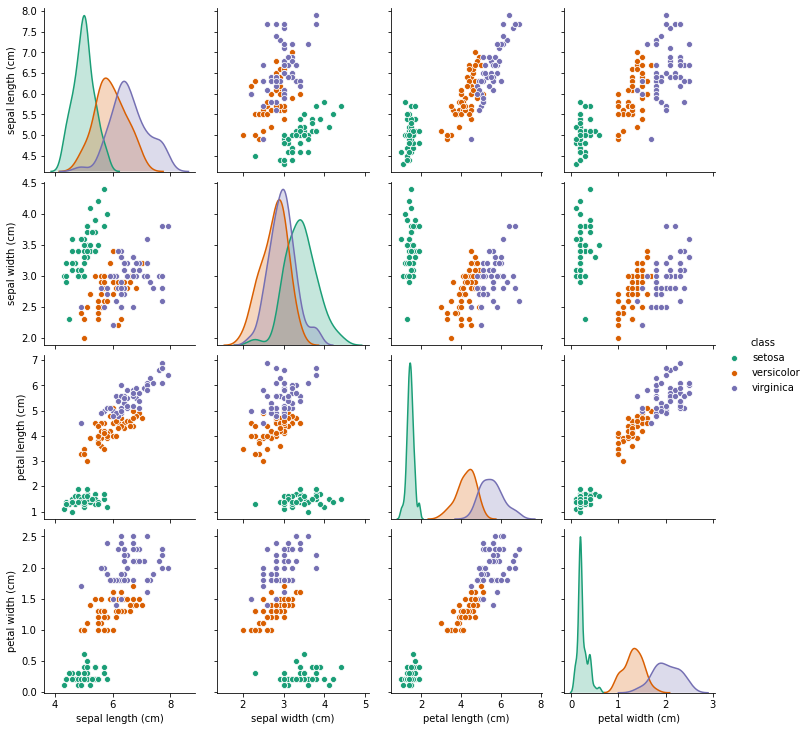

In [7]:
sns.pairplot(data, hue='class', palette='Dark2')

### **Machine Learning**

In [8]:
# divide os dados em treino e teste 
from sklearn.model_selection import train_test_split

X = iris.data[:, :2] #pega as duas primeiras features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**KNN**

In [9]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [10]:
# Métricas do modelo 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.78      0.67         9
           2       0.75      0.55      0.63        11

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.77        30
weighted avg       0.78      0.77      0.76        30



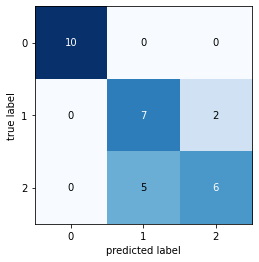

In [11]:
# Plota a matriz de confusão do KNN
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz_confusao = confusion_matrix(y_test, y_pred)


fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Visualização KNN**

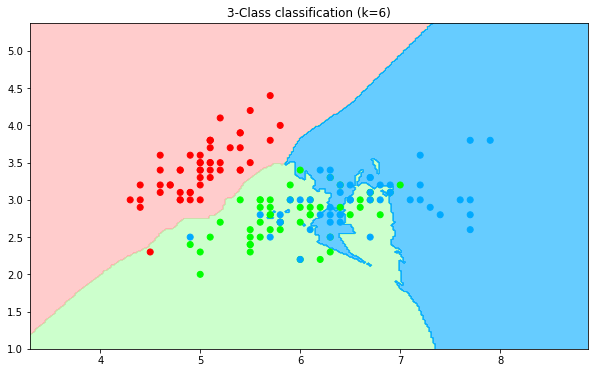

In [19]:
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# calculate min, max and limits
h = .02

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y*100, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-Class classification (k=6)')
plt.show()

**Decision Tree**

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
# Métricas do modelo 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



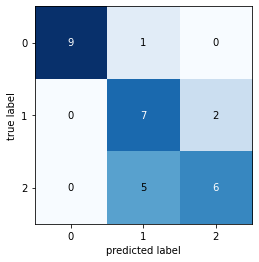

In [22]:
# Plota a matriz de confusão do CLF

matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Visualização Árvode de Decisão**

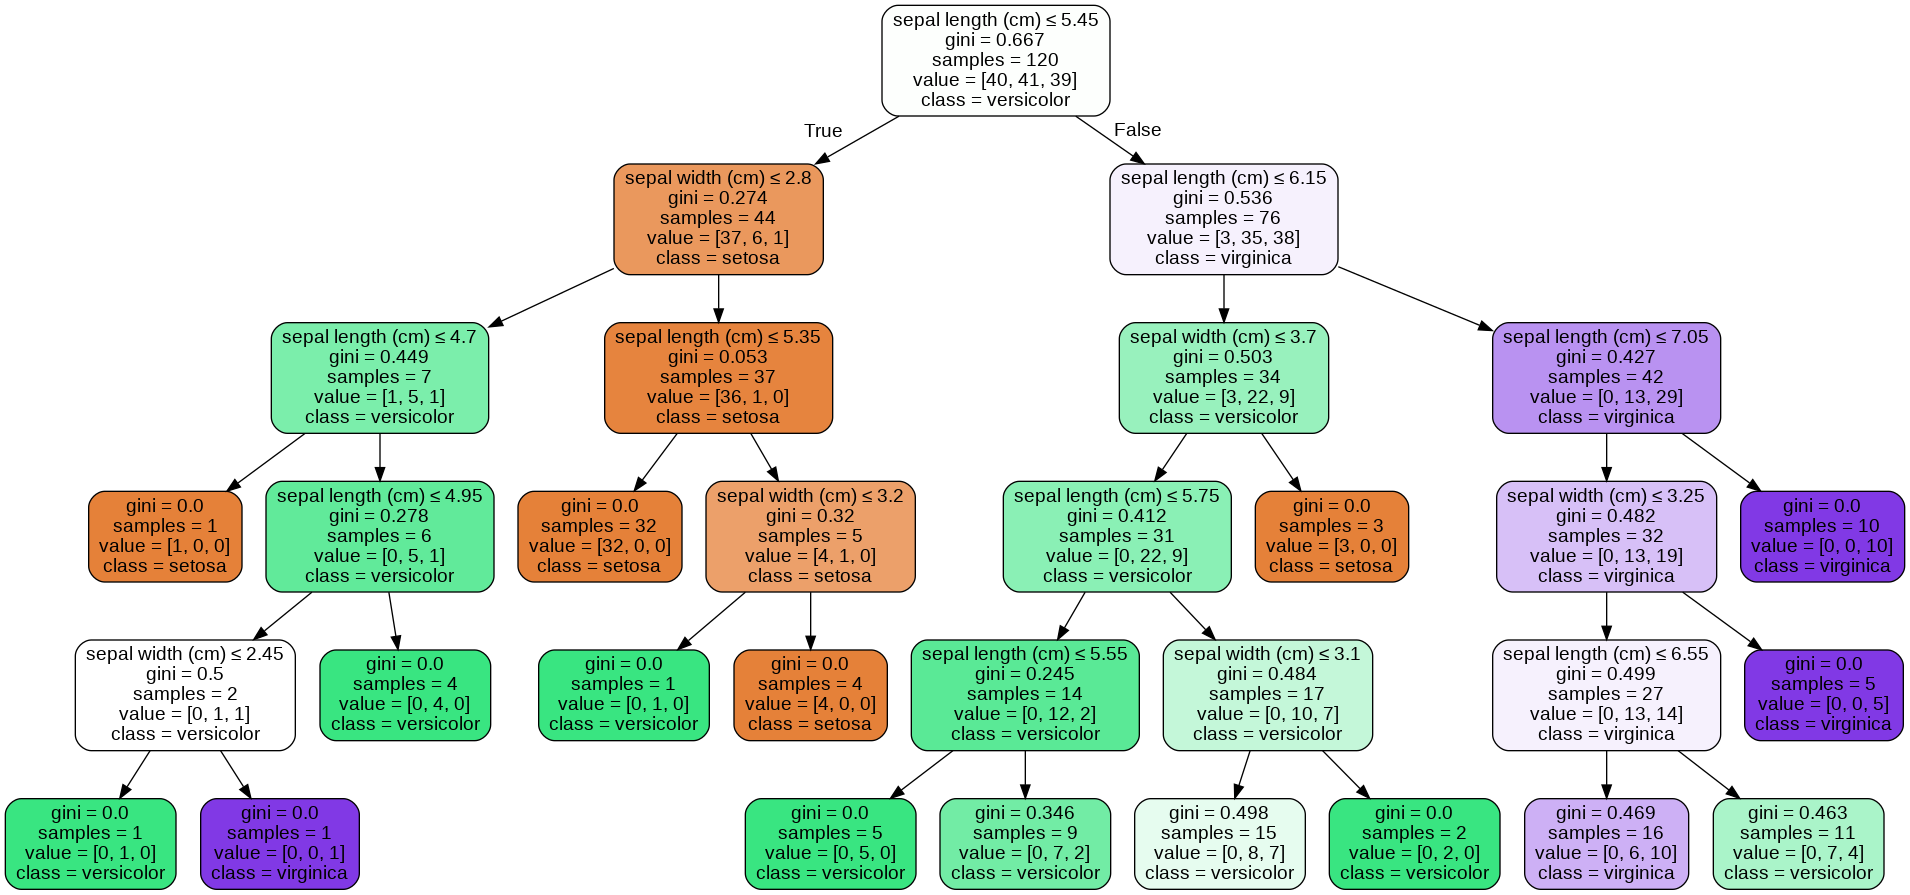

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#visualiza o modelo 

#Constrói a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =['sepal length (cm)',	'sepal width (cm)'], class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())


### **Validação Cruzada**

In [23]:
from sklearn.model_selection import cross_val_score

cv_knn = cross_val_score(knn, X, y)
cv_clf = cross_val_score(clf, X, y)

print(f'KNN: {cv_knn} \nCLF: {cv_clf}') 

KNN: [0.73333333 0.86666667 0.83333333 0.9        0.73333333] 
CLF: [0.73333333 0.86666667 0.73333333 0.76666667 0.86666667]


In [24]:
# Média das validações cruzadas 

sum_cv_knn = 0 
for score in cv_knn:
  sum_cv_knn += score
print('Resultado KNN: ', sum_cv_knn/5)

sum_cv_clf = 0 
for score in cv_clf:
  sum_cv_clf += score
print('Resultado CLF: ', sum_cv_clf/5)

Resultado KNN:  0.8133333333333332
Resultado CLF:  0.7933333333333333


**Otimização do modelo**

In [17]:
# Busca de hiperparâmetros 
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1, 11)}
grid_knn = GridSearchCV(knn, parameters)
grid_knn.fit(X, y)
grid_knn.best_params_


{'n_neighbors': 6}

In [18]:
parameters2 = {'max_depth': range(2, 11), 'criterion': ['gini', 'entropy']}
grid_clf = GridSearchCV(clf, parameters2)
grid_clf.fit(X, y)
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}